In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("Group_2_data_cleaned.csv")
data=data.drop('Unnamed: 0',axis=1)
data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [4]:
from sklearn.cluster import KMeans

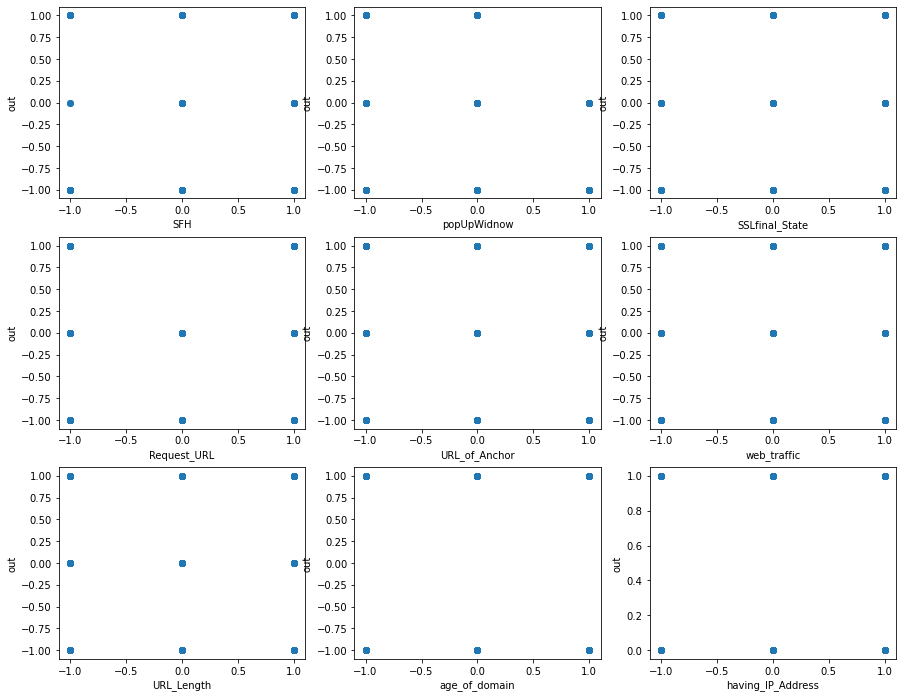

In [5]:
import matplotlib.pyplot as plt
figures = []
i=1
plt.figure(figsize=(15,12))
for column in X.columns:
    plt.subplot(3, 3,i)
    plt.scatter(y, X[column])
    plt.xlabel(column)
    plt.ylabel("out")
    i=i+1

In [6]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    sil.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean'))


Text(0, 0.5, 'Silhouette Score')

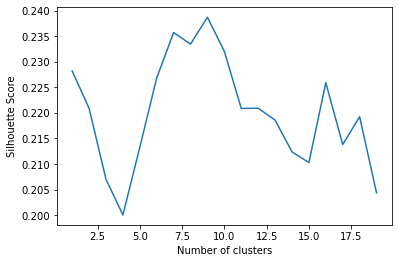

In [7]:
plt.plot(range(1,20),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

Text(0, 0.5, 'calinski harabasz score')

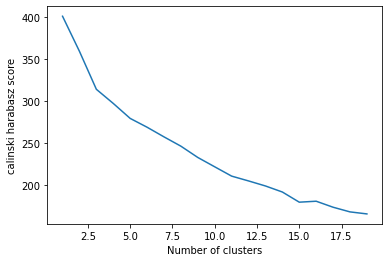

In [8]:
from sklearn.metrics import calinski_harabasz_score

cal = []
kmax = 20

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    cal.append(calinski_harabasz_score(X, kmeans.labels_))
    
plt.plot(range(1,20),cal)

plt.xlabel('Number of clusters')
plt.ylabel('calinski harabasz score')

In [9]:
kmeans = KMeans(9)
kmeans.fit(X)

KMeans(n_clusters=9)

In [10]:
kmeans.inertia_

3167.8055213378616

In [11]:
kmeans.score(X)

-3167.8055213378616

In [12]:
kmeans.transform(X)

array([[3.37487199, 3.39101433, 2.15663465, ..., 3.28018091, 2.83492427,
        2.51593004],
       [2.83838468, 4.08462524, 3.21289819, ..., 4.35008312, 1.942379  ,
        3.68132126],
       [3.07475014, 2.66895426, 1.72177404, ..., 3.38117051, 2.30674219,
        2.54156125],
       ...,
       [1.46628608, 4.39173519, 3.5624253 , ..., 3.69711748, 2.5482638 ,
        2.81140144],
       [2.974206  , 2.01883575, 1.7980997 , ..., 2.70614544, 2.01296399,
        2.78825186],
       [3.60283281, 2.35624452, 3.28032403, ..., 1.65021912, 4.00206085,
        2.77159806]])

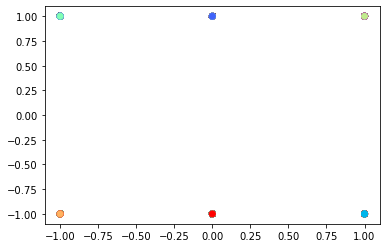

In [13]:
clusters_data = data.copy()
clusters_data['Clusters'] = kmeans.fit_predict(X)
plt.scatter(clusters_data['popUpWidnow'],clusters_data['age_of_domain'],c=clusters_data['Clusters'],cmap='rainbow')